### Read Dataset

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score


# Models from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
# Evaluation metrics
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [ ]:

df1 = pd.read_csv('/content/drive/MyDrive/machine learning NTI/ml_project/data_sets/megaGymDataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/machine learning NTI/ml_project/data_sets/workout_fitness_tracker_data.csv')

In [ ]:
df1.describe()

,Unnamed: 0,Rating
count,2918.000000,1031.000000
mean,1458.500000,5.919690
std,842.498368,3.584607
min,0.000000,0.000000
25%,729.250000,3.000000
50%,1458.500000,7.900000
75%,2187.750000,8.700000
max,2917.000000,9.600000


In [ ]:
df2.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


### Show data after merge

In [ ]:
df = pd.concat([df1, df2])
df.describe()

,Unnamed: 0,Rating,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,2918.000000,1031.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,1458.500000,5.919690,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,842.498368,3.584607,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,0.000000,0.000000,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,729.250000,3.000000,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,1458.500000,7.900000,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,2187.750000,8.700000,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,2917.000000,9.600000,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [ ]:
# Check column names and data types
print(df.info())

# Summary statistics
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
Index: 12918 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2918 non-null   float64
 1   Title                     2918 non-null   object 
 2   Desc                      1368 non-null   object 
 3   Type                      2918 non-null   object 
 4   BodyPart                  2918 non-null   object 
 5   Equipment                 2886 non-null   object 
 6   Level                     2918 non-null   object 
 7   Rating                    1031 non-null   float64
 8   RatingDesc                862 non-null    object 
 9   User ID                   10000 non-null  float64
 10  Age                       10000 non-null  float64
 11  Gender                    10000 non-null  object 
 12  Height (cm)               10000 non-null  float64
 13  Weight (kg)               10000 non-null  float64
 14  Workout Type

# preprocessing

In [ ]:
# Count missing values
print(df.isnull().sum())

# Identify numerical and categorical columns (excluding the target variable 'Level')
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Level' from numerical features if it's numeric and we are predicting it
if 'Level' in numerical_features:
    numerical_features.remove('Level')

categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
# Exclude 'Level' from categorical features if it's categorical and we are predicting it
if 'Level' in categorical_features:
     categorical_features.remove('Level')


# Impute missing values in numerical columns with the mean
for col in numerical_features:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

# Impute missing values in categorical columns with a placeholder
for col in categorical_features:
    if df[col].isnull().any():
        df[col].fillna('Missing', inplace=True)


# Verify that there are no more missing values in the relevant columns
print("\nMissing values after imputation:")
print(df[numerical_features + categorical_features].isnull().sum())

Unnamed: 0                  10000
Title                       10000
Desc                        11550
Type                        10000
BodyPart                    10000
Equipment                   10032
Level                       10000
Rating                      11887
RatingDesc                  12056
User ID                      2918
Age                          2918
Gender                       2918
Height (cm)                  2918
Weight (kg)                  2918
Workout Type                 2918
Workout Duration (mins)      2918
Calories Burned              2918
Heart Rate (bpm)             2918
Steps Taken                  2918
Distance (km)                2918
Workout Intensity            2918
Sleep Hours                  2918
Water Intake (liters)        2918
Daily Calories Intake        2918
Resting Heart Rate (bpm)     2918
VO2 Max                      2918
Body Fat (%)                 2918
Mood Before Workout          2918
Mood After Workout           2918
dtype: int64



/tmp/ipython-input-205-2225684555.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-205-2225684555.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
#dublicatied
df.duplicated().sum()

np.int64(0)

In [ ]:
#if blansed
sns.countplot(data=df,x = 'Weight (kg)')

<Axes: xlabel='Weight (kg)', ylabel='count'>

In [ ]:
# drop
columns_to_drop = ['date', 'heart_rate', 'username']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


# visulize

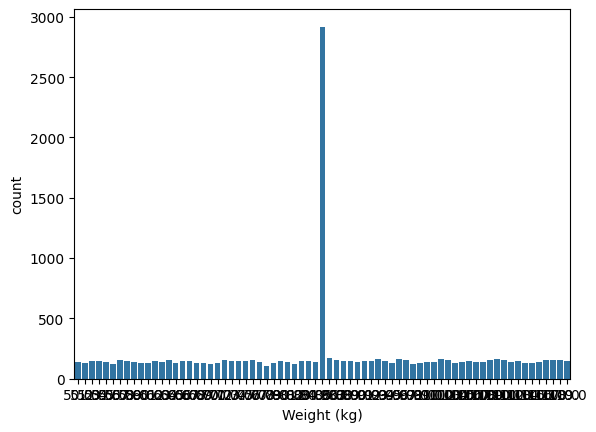

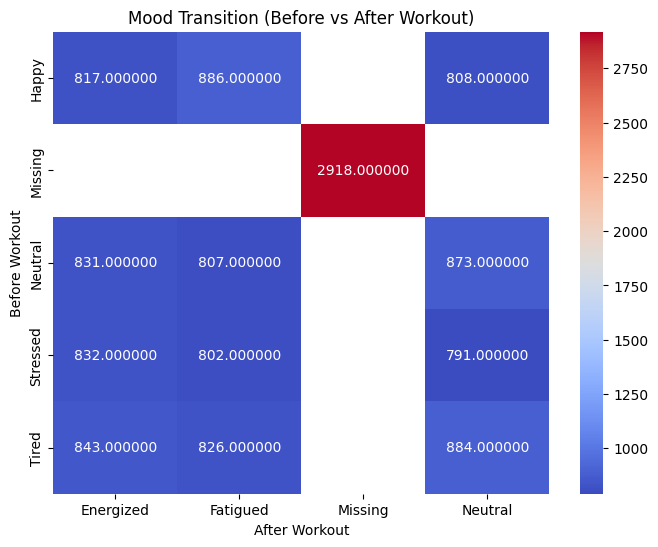

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='f', cmap='coolwarm')
plt.title('Mood Transition (Before vs After Workout)')
plt.ylabel('Before Workout')
plt.xlabel('After Workout')
plt.show()


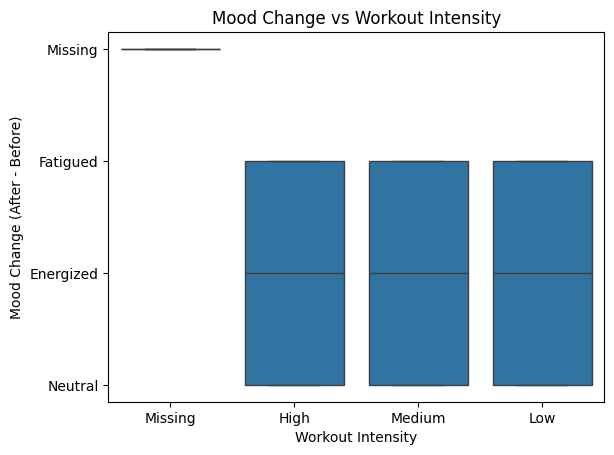

In [ ]:

#  Mood change vs Workout Intensity
sns.boxplot(x='Workout Intensity', y='Mood After Workout', data=df)
plt.title('Mood Change vs Workout Intensity')
plt.xlabel('Workout Intensity')
plt.ylabel('Mood Change (After - Before)')
plt.show()


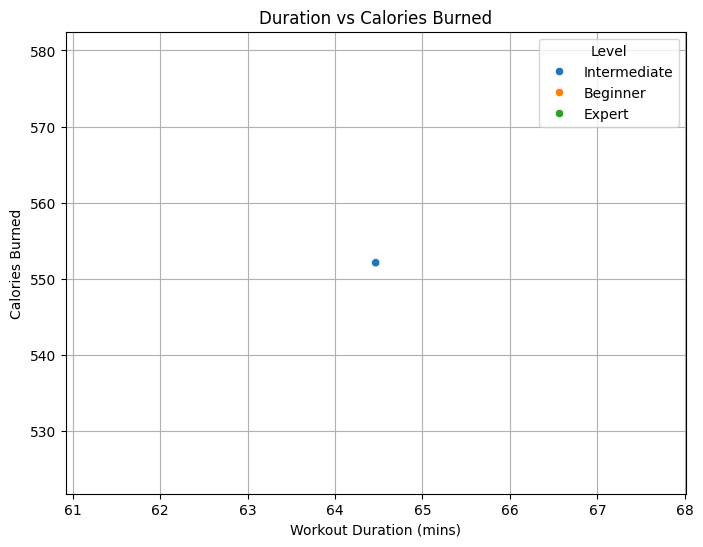

In [ ]:
#Workout Duration vs Calories Burned
plt.figure(figsize=(8, 6))

# Convert to numeric, coercing errors to NaN
df['Workout Duration (mins)'] = pd.to_numeric(df['Workout Duration (mins)'], errors='coerce')
df['Calories Burned'] = pd.to_numeric(df['Calories Burned'], errors='coerce')

# Drop rows with NaN in these columns for plotting
df_plot = df.dropna(subset=['Workout Duration (mins)', 'Calories Burned', 'Level']).copy()


sns.scatterplot(data=df_plot, x='Workout Duration (mins)', y='Calories Burned', hue='Level')
plt.title('Duration vs Calories Burned')
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

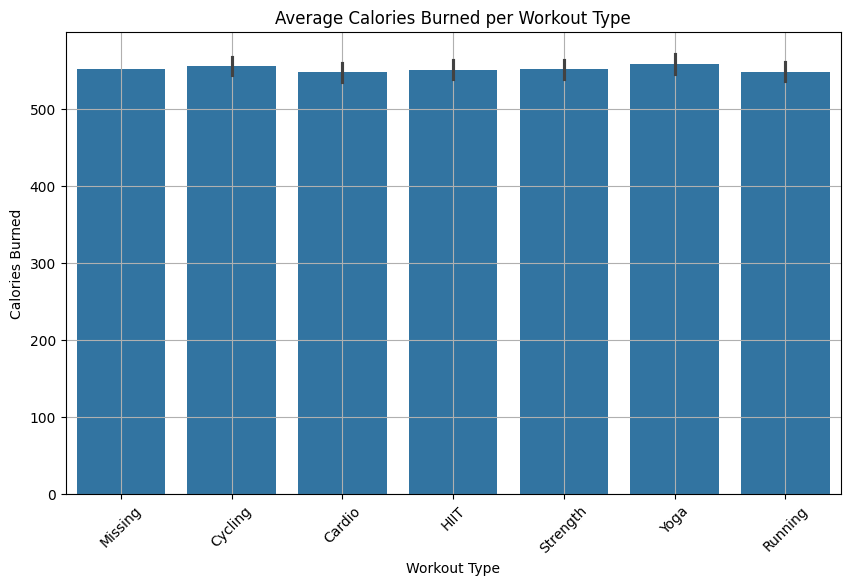

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Workout Type', y='Calories Burned', estimator='mean')
plt.title('Average Calories Burned per Workout Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

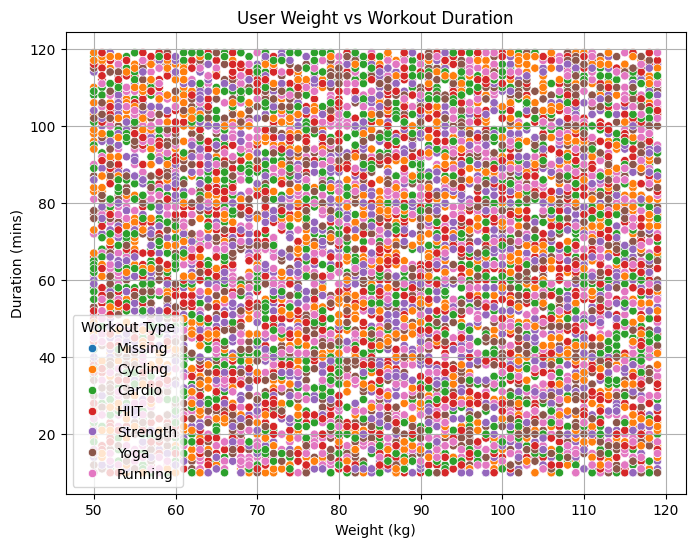

In [ ]:
plt.figure(figsize=(8, 6))
df_plot_weight_duration = df.dropna(subset=['Weight (kg)', 'Workout Duration (mins)', 'Workout Type']).copy()
df_plot_weight_duration['Workout Type'] = df_plot_weight_duration['Workout Type'].astype(str)
sns.scatterplot(data=df_plot_weight_duration, x='Weight (kg)', y='Workout Duration (mins)', hue='Workout Type')
plt.title('User Weight vs Workout Duration')
plt.xlabel('Weight (kg)')
plt.ylabel('Duration (mins)')
plt.grid(True)
plt.show()

# Feature Engineering


In [ ]:
# Mood Change (New Feature)
# Map mood states to numerical values
mood_mapping = {'Tired': -2, 'Stressed': -1, 'Neutral': 0, 'Happy': 1, 'Energized': 2, 'Fatigued': -1.5, 'Unknown': 0}

df['mood_before_encoded'] = df['Mood Before Workout'].map(mood_mapping)
df['mood_after_encoded'] = df['Mood After Workout'].map(mood_mapping)

# Calculate mood change
df['mood_change'] = df['mood_after_encoded'] - df['mood_before_encoded']

# Display the new columns and the original mood columns
display(df[['Mood Before Workout', 'Mood After Workout', 'mood_before_encoded', 'mood_after_encoded', 'mood_change']].head())

,Mood Before Workout,Mood After Workout,mood_before_encoded,mood_after_encoded,mood_change
0,Missing,Missing,NaN,NaN,NaN
1,Missing,Missing,NaN,NaN,NaN
2,Missing,Missing,NaN,NaN,NaN
3,Missing,Missing,NaN,NaN,NaN
4,Missing,Missing,NaN,NaN,NaN


In [ ]:
#Hydration Ratio
df['hydration_ratio'] = df['Water Intake (liters)'] / df['Workout Duration (mins)']
df['hydration_ratio'].fillna(0, inplace=True)
display(df[['Water Intake (liters)', 'Workout Duration (mins)', 'hydration_ratio']].head())

/tmp/ipython-input-215-534116628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hydration_ratio'].fillna(0, inplace=True)


,Water Intake (liters),Workout Duration (mins),hydration_ratio
0,1.9,64.4648,0.029473
1,1.9,64.4648,0.029473
2,1.9,64.4648,0.029473
3,1.9,64.4648,0.029473
4,1.9,64.4648,0.029473


In [ ]:
#Fat-to-Fitness Score
df['VO2 Max'] = pd.to_numeric(df['VO2 Max'], errors='coerce')
df['Body Fat (%)'] = pd.to_numeric(df['Body Fat (%)'], errors='coerce')
df['fitness_score'] = df['VO2 Max'] / df['Body Fat (%)']
df['fitness_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['fitness_score'].fillna(df['fitness_score'].median(), inplace=True)
display(df[['VO2 Max', 'Body Fat (%)', 'fitness_score']].head())

/tmp/ipython-input-216-3160326907.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fitness_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-216-3160326907.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,VO2 Max,Body Fat (%),fitness_score
0,38.4,28.5,1.347368
1,38.4,28.5,1.347368
2,38.4,28.5,1.347368
3,38.4,28.5,1.347368
4,38.4,28.5,1.347368


# Spliting

In [ ]:
# Convert potentially problematic columns to numeric before splitting
numerical_cols_to_convert = [
    'User ID', 'Age', 'Height (cm)', 'Weight (kg)',
    'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken',
    'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
    'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'mood_before_encoded',
    'mood_after_encoded', 'mood_change', 'hydration_ratio', 'fitness_score', 'Unnamed: 0', 'Rating'
]

for col in numerical_cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where the target variable 'Level' is missing
df_cleaned = df.dropna(subset=['Level']).copy()


X = df_cleaned.drop('Level', axis=1)
y = df_cleaned['Level']


print("Shape of X after dropping NaNs in Level and converting numerical columns:", X.shape)
print("Shape of y after dropping NaNs in Level and converting numerical columns:", y.shape)

Shape of X after dropping NaNs in Level and converting numerical columns: (2918, 33)
Shape of y after dropping NaNs in Level and converting numerical columns: (2918,)


In [ ]:
#  Splitting Train & Test

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2334, 33)
Shape of X_test: (584, 33)
Shape of y_train: (2334,)
Shape of y_test: (584,)


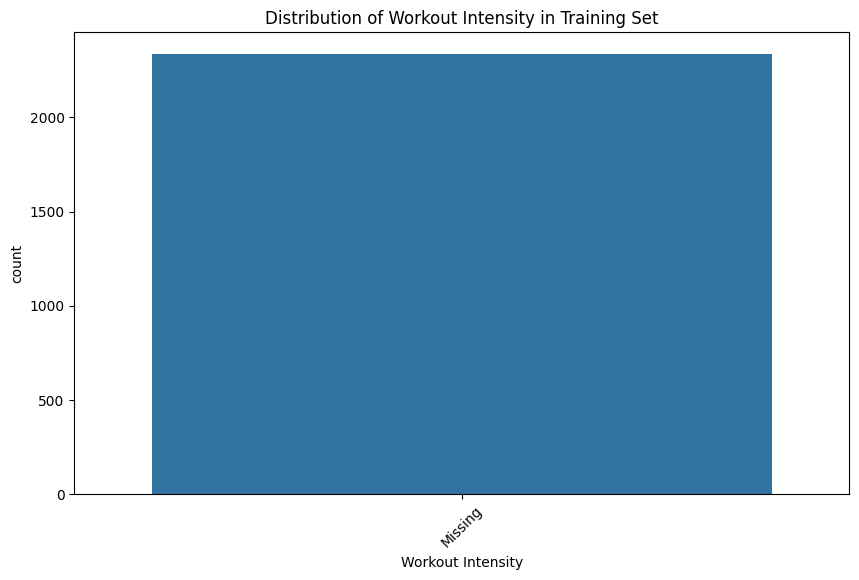

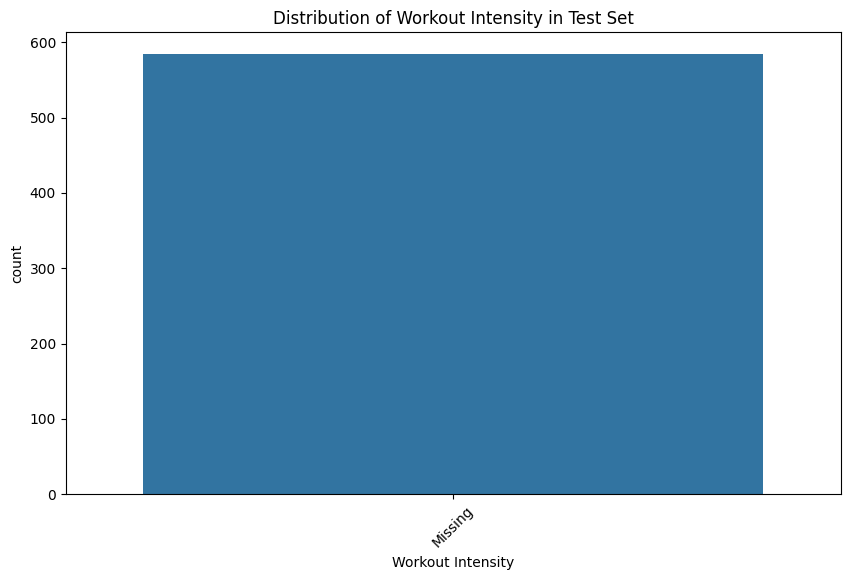

In [ ]:
# vis train and test

plt.figure(figsize=(10, 6))
sns.countplot(data=X_train, x='Workout Intensity', order=X_train['Workout Intensity'].value_counts().index)
plt.title('Distribution of Workout Intensity in Training Set')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=X_test, x='Workout Intensity', order=X_test['Workout Intensity'].value_counts().index)
plt.title('Distribution of Workout Intensity in Test Set')
plt.xticks(rotation=45)
plt.show()



# Scaling

In [ ]:
from sklearn.impute import SimpleImputer

# Define numerical features to be scaled, excluding those with only NaNs
numerical_features_to_scale = [col for col in numerical_features if col not in ['mood_before_encoded', 'mood_after_encoded', 'mood_change']]


# Impute missing values in the selected numerical features with the mean *before* scaling
imputer = SimpleImputer(strategy='mean')
X_train_numerical_imputed = imputer.fit_transform(X_train[numerical_features_to_scale])
X_test_numerical_imputed = imputer.transform(X_test[numerical_features_to_scale])

# Scale the imputed numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical_imputed)
X_test_numerical_scaled = scaler.transform(X_test_numerical_imputed)

# Convert scaled arrays back to DataFrames and assign back to the original DataFrames
X_train[numerical_features_to_scale] = pd.DataFrame(X_train_numerical_scaled, index=X_train.index, columns=numerical_features_to_scale)
X_test[numerical_features_to_scale] = pd.DataFrame(X_test_numerical_scaled, index=X_test.index, columns=numerical_features_to_scale)


print("Scaled X_train (first 5 rows):\n", X_train[numerical_features_to_scale].head())
print("\nScaled X_test (first 5 rows):\n", X_test[numerical_features_to_scale].head())

Scaled X_train (first 5 rows):
       Unnamed: 0    Rating  User ID           Age   Height (cm)  Weight (kg)  \
2137    0.812493  0.743920      0.0 -7.105427e-15 -2.842171e-14          0.0   
1996    0.644362  0.004934      0.0 -7.105427e-15 -2.842171e-14          0.0   
570    -1.056029  0.004934      0.0 -7.105427e-15 -2.842171e-14          0.0   
2271    0.972277  0.004934      0.0 -7.105427e-15 -2.842171e-14          0.0   
1582    0.150700 -2.763240      0.0 -7.105427e-15 -2.842171e-14          0.0   

      Workout Duration (mins)  Calories Burned  Heart Rate (bpm)  Steps Taken  \
2137             1.421085e-14              0.0               0.0          0.0   
1996             1.421085e-14              0.0               0.0          0.0   
570              1.421085e-14              0.0               0.0          0.0   
2271             1.421085e-14              0.0               0.0          0.0   
1582             1.421085e-14              0.0               0.0          0.0   



In [ ]:
#  encoding

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# One-Hot Encode categorical features
# We need to handle potential unknown categories in the test set during transformation
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output=False for dense arrays
X_train_categorical_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_categorical_encoded = ohe.transform(X_test[categorical_features]) # Use transform on test set

# Get the new column names after one-hot encoding
new_categorical_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine scaled numerical features and one-hot encoded categorical features
X_train_processed = np.hstack((X_train[numerical_features], X_train_categorical_encoded))
X_test_processed = np.hstack((X_test[numerical_features], X_test_categorical_encoded))

# Update feature names list for the processed data
processed_feature_names = numerical_features + list(new_categorical_feature_names)

# Convert processed arrays back to DataFrames if needed for subsequent steps
# (This can sometimes make it easier to keep track of columns, but might add overhead)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)


print("Shape of X_train_processed:", X_train_processed_df.shape)
print("Shape of X_test_processed:", X_test_processed_df.shape)

# Label Encode the target variable 'Level'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("\nOriginal y_train (first 5):\n", y_train.head())
print("\nEncoded y_train (first 5):\n", y_train_encoded[:5])
print("\nClasses in y_train_encoded:", le.classes_)

Shape of X_train_processed: (2334, 3275)
Shape of X_test_processed: (584, 3275)

Original y_train (first 5):
 2137    Intermediate
1996    Intermediate
570     Intermediate
2271    Intermediate
1582        Beginner
Name: Level, dtype: object

Encoded y_train (first 5):
 [2 2 2 2 0]

Classes in y_train_encoded: ['Beginner' 'Expert' 'Intermediate']


# Machine Learning Models & Evaluation

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc', 'User ID', 'Age', 'Gender', 'Height (cm)',
       'Weight (kg)', 'Workout Type', 'Workout Duration (mins)',
       'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)',
       'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max',
       'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout',
       'mood_before_encoded', 'mood_after_encoded', 'mood_change',
       'hydration_ratio', 'fitness_score'],
      dtype='object')


In [ ]:
#  models

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.impute import SimpleImputer


# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),  # Use a suitable solver and max_iter
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging Classifier': BaggingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(probability=True, random_state=42) # probability=True for roc_auc_score
}

# Dictionary to store results
results = {}

# Drop columns that contain only NaNs (these were the mood-encoded columns)
cols_to_drop_final = ['mood_before_encoded', 'mood_after_encoded', 'mood_change']
X_train_processed_df = X_train_processed_df.drop(columns=[col for col in cols_to_drop_final if col in X_train_processed_df.columns])
X_test_processed_df = X_test_processed_df.drop(columns=[col for col in cols_to_drop_final if col in X_test_processed_df.columns])


# Impute any remaining missing values in the processed data
imputer_final = SimpleImputer(strategy='mean') # Using mean imputation for simplicity
X_train_imputed = imputer_final.fit_transform(X_train_processed_df)
X_test_imputed = imputer_final.transform(X_test_processed_df)


# Evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_imputed, y_train_encoded)
    y_pred = model.predict(X_test_imputed)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    classification_rep = classification_report(y_test_encoded, y_pred, target_names=le.classes_)

    # For ROC AUC, we need probability estimates. Not all models support predict_proba.
    # We also need to handle the multi-class case (OVA - One vs All)
    roc_auc = 'N/A'
    if hasattr(model, 'predict_proba'):
        try:
            y_prob = model.predict_proba(X_test_imputed)
            # Binarize the true labels for OVA ROC AUC
            y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
            roc_auc = roc_auc_score(y_test_bin, y_prob, average='weighted')
        except Exception as e:
            roc_auc = f"Error calculating ROC AUC: {e}"


    results[name] = {
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_rep,
        'ROC AUC (Weighted OVA)': roc_auc
    }

    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Weighted): {precision:.4f}")
    print(f"  Recall (Weighted): {recall:.4f}")
    print(f"  F1-Score (Weighted): {f1:.4f}")
    print(f"  ROC AUC (Weighted OVA): {roc_auc}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", classification_rep)
    print("-" * 30)



Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.9127
  Precision (Weighted): 0.9037
  Recall (Weighted): 0.9127
  F1-Score (Weighted): 0.9061
  ROC AUC (Weighted OVA): 0.9449630831291878

Confusion Matrix:
 [[ 58   0  34]
 [  0   0   3]
 [ 14   0 475]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.81      0.63      0.71        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.93      0.97      0.95       489

    accuracy                           0.91       584
   macro avg       0.58      0.53      0.55       584
weighted avg       0.90      0.91      0.91       584

------------------------------
Training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Decision Tree Results:
  Accuracy: 0.9401
  Precision (Weighted): 0.9359
  Recall (Weighted): 0.9401
  F1-Score (Weighted): 0.9378
  ROC AUC (Weighted OVA): 0.8754017168987706

Confusion Matrix:
 [[ 74   0  18]
 [  0   0   3]
 [ 13   1 475]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.85      0.80      0.83        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.96      0.97      0.96       489

    accuracy                           0.94       584
   macro avg       0.60      0.59      0.60       584
weighted avg       0.94      0.94      0.94       584

------------------------------
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Results:
  Accuracy: 0.9349
  Precision (Weighted): 0.9283
  Recall (Weighted): 0.9349
  F1-Score (Weighted): 0.9300
  ROC AUC (Weighted OVA): 0.9769419122003744

Confusion Matrix:
 [[ 66   0  26]
 [  0   0   3]
 [  9   0 480]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.88      0.72      0.79        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.94      0.98      0.96       489

    accuracy                           0.93       584
   macro avg       0.61      0.57      0.58       584
weighted avg       0.93      0.93      0.93       584

------------------------------
Training AdaBoost...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost Results:
  Accuracy: 0.9110
  Precision (Weighted): 0.9020
  Recall (Weighted): 0.9110
  F1-Score (Weighted): 0.9050
  ROC AUC (Weighted OVA): 0.9017044681228247

Confusion Matrix:
 [[ 59   0  33]
 [  0   0   3]
 [ 16   0 473]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.79      0.64      0.71        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.93      0.97      0.95       489

    accuracy                           0.91       584
   macro avg       0.57      0.54      0.55       584
weighted avg       0.90      0.91      0.91       584

------------------------------
Training Bagging Classifier...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Bagging Classifier Results:
  Accuracy: 0.9401
  Precision (Weighted): 0.9351
  Recall (Weighted): 0.9401
  F1-Score (Weighted): 0.9376
  ROC AUC (Weighted OVA): 0.9511262144105087

Confusion Matrix:
 [[ 76   0  16]
 [  0   0   3]
 [ 16   0 473]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.83      0.83      0.83        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.96      0.97      0.96       489

    accuracy                           0.94       584
   macro avg       0.60      0.60      0.60       584
weighted avg       0.94      0.94      0.94       584

------------------------------
Training Extra Trees...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Extra Trees Results:
  Accuracy: 0.9418
  Precision (Weighted): 0.9357
  Recall (Weighted): 0.9418
  F1-Score (Weighted): 0.9371
  ROC AUC (Weighted OVA): 0.9684663528633778

Confusion Matrix:
 [[ 68   0  24]
 [  0   0   3]
 [  7   0 482]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.91      0.74      0.81        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.95      0.99      0.97       489

    accuracy                           0.94       584
   macro avg       0.62      0.57      0.59       584
weighted avg       0.94      0.94      0.94       584

------------------------------
Training HistGradientBoosting...
HistGradientBoosting Results:
  Accuracy: 0.9435
  Precision (Weighted): 0.9409
  Recall (Weighted): 0.9435
  F1-Score (Weighted): 0.9422
  ROC AUC (Weighted OVA): 0.9760340153032541

Confusion Matrix:
 [[ 79   0  13]
 [  0   0   3]
 [ 16   1 472]]

Classification Report:
               pr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

KNeighbors Results:
  Accuracy: 0.9229
  Precision (Weighted): 0.9217
  Recall (Weighted): 0.9229
  F1-Score (Weighted): 0.9220
  ROC AUC (Weighted OVA): 0.9506353803949914

Confusion Matrix:
 [[ 76   0  16]
 [  0   0   3]
 [ 26   0 463]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.75      0.83      0.78        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.96      0.95      0.95       489

    accuracy                           0.92       584
   macro avg       0.57      0.59      0.58       584
weighted avg       0.92      0.92      0.92       584

------------------------------
Training SVC...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

SVC Results:
  Accuracy: 0.9452
  Precision (Weighted): 0.9392
  Recall (Weighted): 0.9452
  F1-Score (Weighted): 0.9419
  ROC AUC (Weighted OVA): 0.9658043058916114

Confusion Matrix:
 [[ 74   0  18]
 [  0   0   3]
 [ 11   0 478]]

Classification Report:
               precision    recall  f1-score   support

    Beginner       0.87      0.80      0.84        92
      Expert       0.00      0.00      0.00         3
Intermediate       0.96      0.98      0.97       489

    accuracy                           0.95       584
   macro avg       0.61      0.59      0.60       584
weighted avg       0.94      0.95      0.94       584

------------------------------


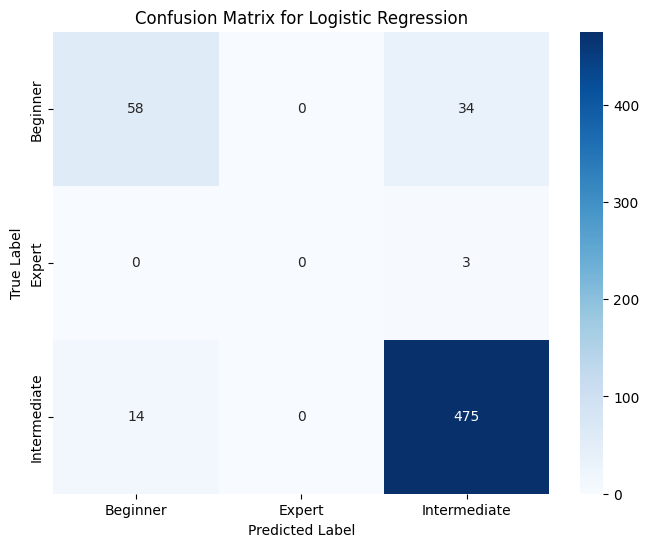

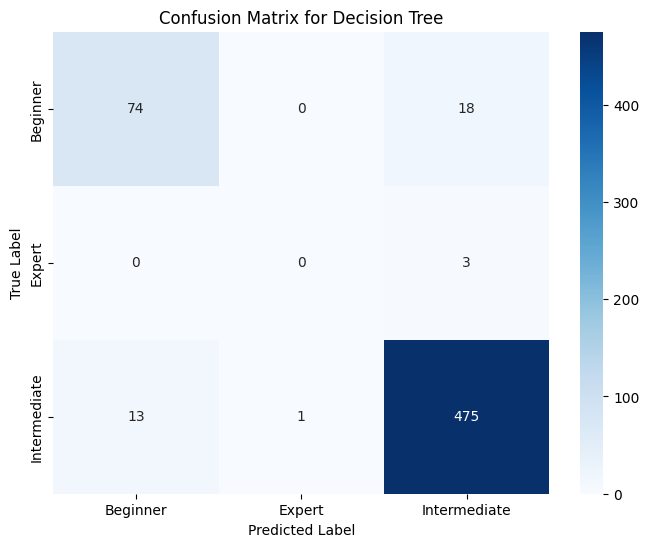

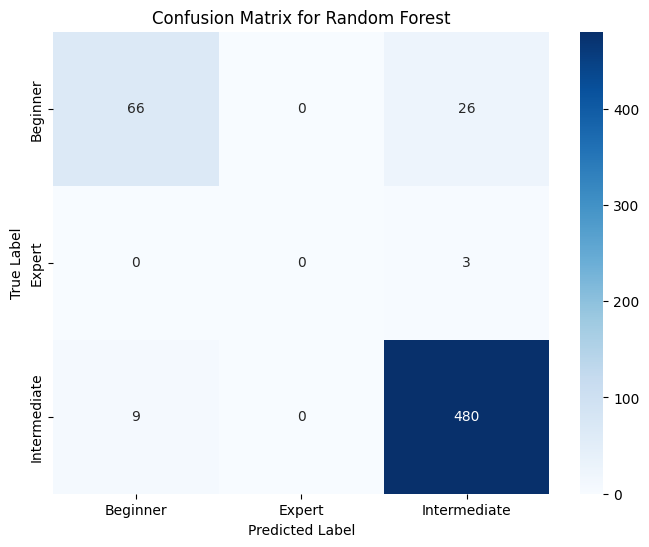

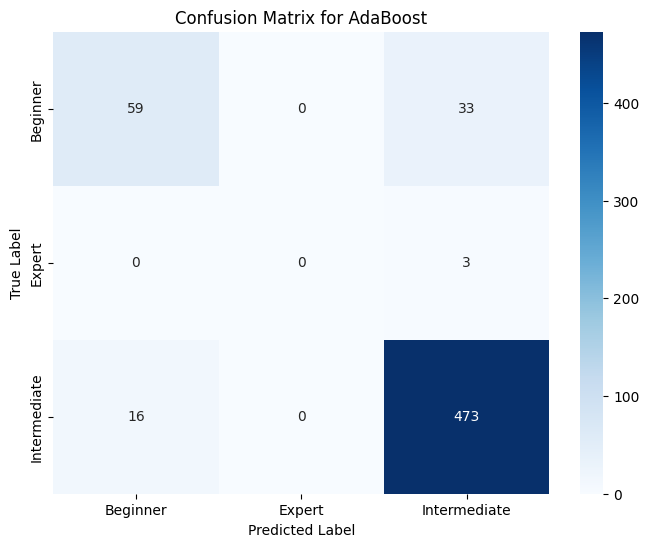

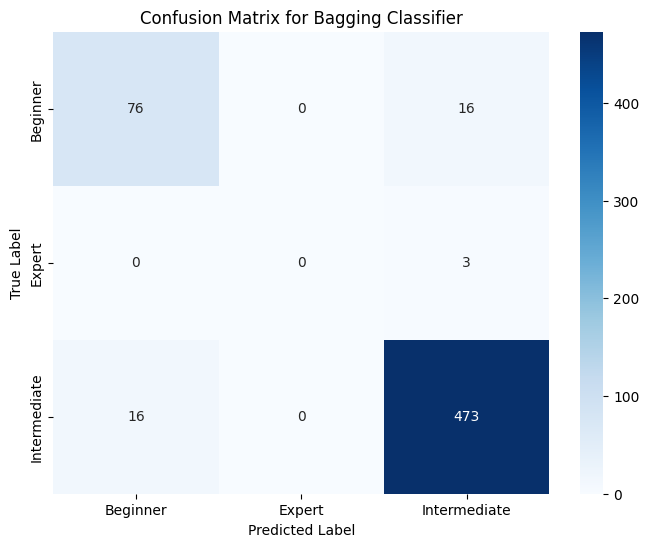

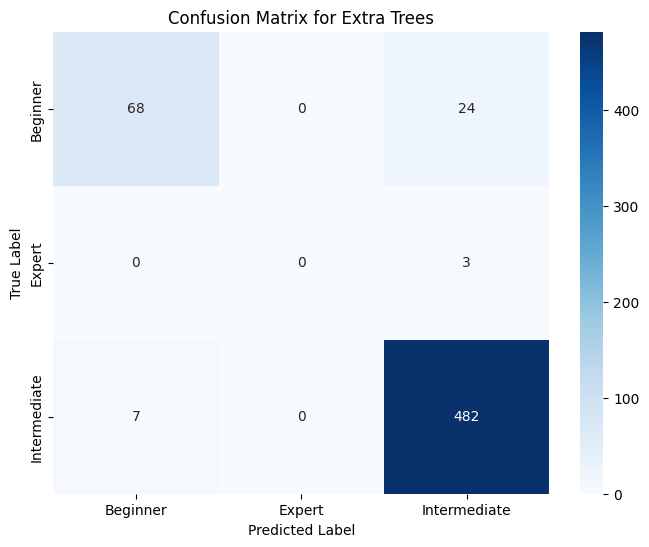

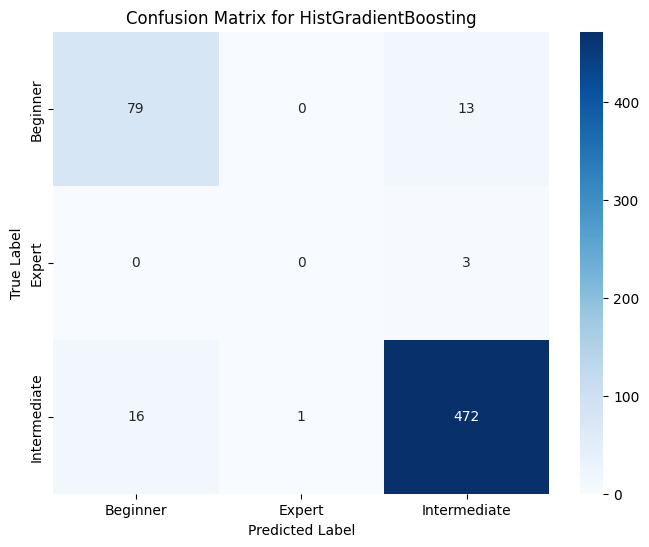

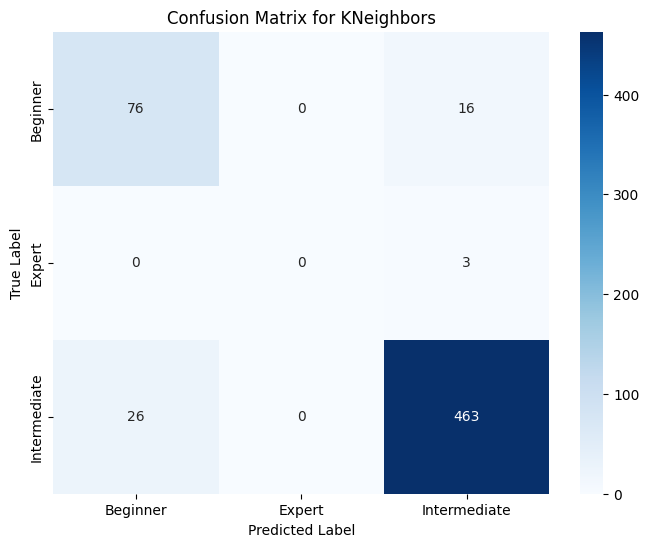

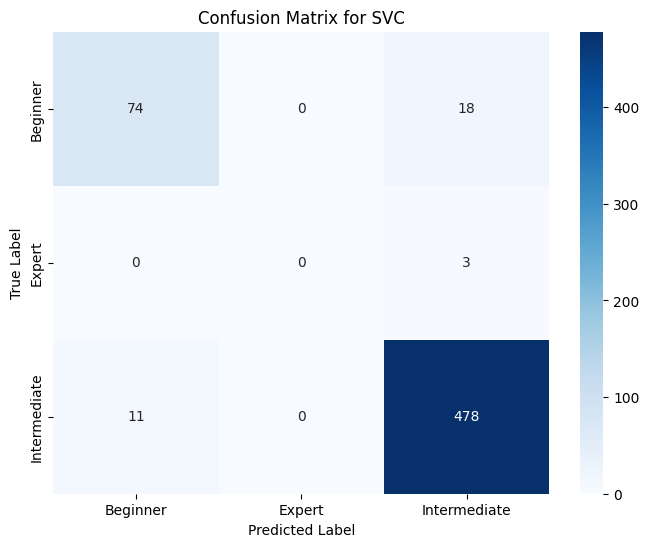

In [ ]:
#  confilution matrex for every model

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Display confusion matrices for each model
for name, result in results.items():
    conf_matrix = result['Confusion Matrix']
    class_names = le.classes_ # Get the original class names

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



<Figure size 1200x800 with 0 Axes>

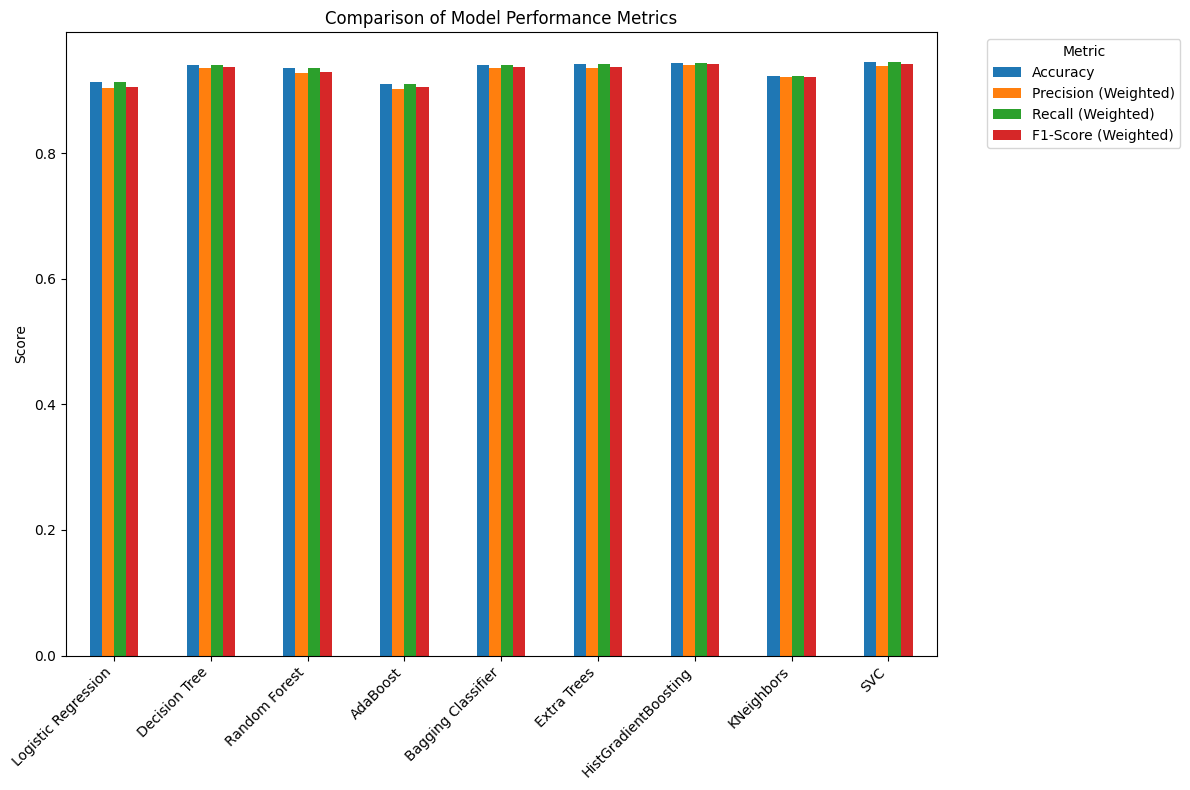

In [ ]:
#  vis the comper between models

import pandas as pd
import matplotlib.pyplot as plt
# Prepare data for visualization
metrics_to_plot = ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)']
model_names = list(results.keys())
metric_values = {metric: [results[name][metric] if isinstance(results[name][metric], (int, float)) else 0 for name in model_names] for metric in metrics_to_plot} # Handle non-numeric ROC AUC

# Create a DataFrame for easy plotting
results_df = pd.DataFrame(metric_values, index=model_names)

# Plot the comparison of metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





In [ ]:
#  show coulmos

df.columns

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc', 'User ID', 'Age', 'Gender', 'Height (cm)',
       'Weight (kg)', 'Workout Type', 'Workout Duration (mins)',
       'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)',
       'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max',
       'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout',
       'mood_before_encoded', 'mood_after_encoded', 'mood_change',
       'hydration_ratio', 'fitness_score'],
      dtype='object')

# diployment

In [ ]:
!pip install -q streamlit pyngrok

!ngrok config add-authtoken YOUR_ACTUAL_AUTHTOKEN_HERE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import joblib
import os

# Create a directory to save models if it doesn't exist
models_dir = 'saved_preprocessing' # Using the same directory as preprocessing objects for simplicity
os.makedirs(models_dir, exist_ok=True)

# Save the trained Logistic Regression model (assuming 'lr' is the variable name from training)
lr_model_filename = os.path.join(models_dir, 'logistic_regression_model.pkl')
joblib.dump(models['Logistic Regression'], lr_model_filename)
print(f"Logistic Regression model saved to {lr_model_filename}")

# Save the trained Random Forest model (assuming 'rf' is the variable name from training)
rf_model_filename = os.path.join(models_dir, 'random_forest_classifier_model.pkl')
joblib.dump(models['Random Forest'], rf_model_filename)
print(f"Random Forest model saved to {rf_model_filename}")

# Save the preprocessor object
preprocessor_filename = os.path.join(models_dir, 'preprocessor.pkl')
joblib.dump(imputer_final, preprocessor_filename) # Saving the imputer as the preprocessor
print(f"Preprocessor saved to {preprocessor_filename}")

feature_names = X_train.columns.tolist()

# Save them
joblib.dump(feature_names, "saved_preprocessing/feature_names.pkl")


Logistic Regression model saved to saved_preprocessing/logistic_regression_model.pkl
Random Forest model saved to saved_preprocessing/random_forest_classifier_model.pkl
Preprocessor saved to saved_preprocessing/preprocessor.pkl


['saved_preprocessing/feature_names.pkl']

In [ ]:
# Load saved feature names
feature_names = joblib.load("saved_preprocessing/feature_names.pkl")

# Reindex and handle missing columns
for col in feature_names:
    if col not in user_input.columns:
        user_input[col] = 0  # or use a default like mean

user_input = user_input[feature_names]


In [ ]:
!ngrok config add-authtoken 2zxQfcMZchS7mcex4Qdb8nhM0yu_5nhBWVooR8wq799NFoeq7


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#  Save Streamlit App File
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

lr_model = joblib.load("saved_preprocessing/logistic_regression_model.pkl")
rf_model = joblib.load("saved_preprocessing/random_forest_classifier_model.pkl")
preprocessor = joblib.load("saved_preprocessing/preprocessor.pkl")

st.set_page_config(page_title="Smart Workout Recommender", layout="wide")
st.title("🏋️ Smart Workout & Calorie Prediction App")

st.sidebar.header("User Input")
mode = st.sidebar.radio("Choose Mode", ["Workout Classification", "Calories Burned Prediction"])

def get_user_input():
    age = st.sidebar.slider("Age", 10, 80, 25)
    height = st.sidebar.slider("Height (cm)", 120, 220, 170)
    weight = st.sidebar.slider("Weight (kg)", 30, 150, 70)
    duration = st.sidebar.slider("Workout Duration (mins)", 10, 120, 30)
    heart_rate = st.sidebar.slider("Heart Rate (bpm)", 60, 200, 120)
    steps = st.sidebar.slider("Steps Taken", 0, 30000, 5000)
    distance = st.sidebar.slider("Distance (km)", 0.0, 20.0, 5.0)
    sleep = st.sidebar.slider("Sleep Hours", 0.0, 12.0, 7.0)
    water = st.sidebar.slider("Water Intake (liters)", 0.0, 5.0, 2.0)
    daily_cal = st.sidebar.slider("Daily Calorie Intake", 1000, 5000, 2500)
    rhr = st.sidebar.slider("Resting Heart Rate (bpm)", 40, 100, 70)
    vo2 = st.sidebar.slider("VO2 Max", 10, 70, 40)
    bodyfat = st.sidebar.slider("Body Fat %", 5, 50, 20)

    data = {
        "Age": age,
        "Height (cm)": height,
        "Weight (kg)": weight,
        "Workout Duration (mins)": duration,
        "Heart Rate (bpm)": heart_rate,
        "Steps Taken": steps,
        "Distance (km)": distance,
        "Sleep Hours": sleep,
        "Water Intake (liters)": water,
        "Daily Calories Intake": daily_cal,
        "Resting Heart Rate (bpm)": rhr,
        "VO2 Max": vo2,
        "Body Fat (%)": bodyfat
    }
    return pd.DataFrame([data])

user_input = get_user_input()
st.subheader("User Input")
st.write(user_input)

if mode == "Workout Classification":
    st.subheader("💪 Predicted Workout Type")
    try:
        X_transformed = preprocessor.transform(user_input)
        prediction = rf_model.predict(X_transformed)
        st.success(f"Recommended Workout: {prediction[0]}")
    except Exception as e:
        st.error(f"Prediction error: {e}")

elif mode == "Calories Burned Prediction":
    st.subheader("🔥 Predicted Calories Burned")
    calories_burned = 5 * user_input["Workout Duration (mins)"].values[0] + 0.1 * user_input["Weight (kg)"].values[0]
    st.success(f"Estimated Calories Burned: {calories_burned:.2f} kcal")

st.markdown("---")
st.subheader("📊 Visual Analysis")

with st.expander("Show Distributions"):
    fig1, ax1 = plt.subplots(figsize=(10, 4))
    sns.histplot(user_input["Heart Rate (bpm)"], bins=10, kde=True, ax=ax1)
    ax1.set_title("Heart Rate Distribution")
    st.pyplot(fig1)

    fig2, ax2 = plt.subplots(figsize=(10, 4))
    sns.barplot(x=user_input.columns, y=user_input.values[0], ax=ax2)
    ax2.set_xticklabels(user_input.columns, rotation=45, ha="right")
    ax2.set_title("User Health Metrics")
    st.pyplot(fig2)

st.caption("Created by Zain's ML Project · NTI · 2025")
'''

with open("app.py", "w") as f:
    f.write(app_code)
print("✅ Streamlit app saved as app.py")


✅ Streamlit app saved as app.py


In [ ]:
!pip install streamlit pyngrok --quiet



In [ ]:
from pyngrok import ngrok

# Replace with your actual token
ngrok.set_auth_token("2zxQfcMZchS7mcex4Qdb8nhM0yu_5nhBWVooR8wq799NFoeq7")


In [ ]:
from pyngrok import ngrok
ngrok.kill()  # This will close all previous tunnels in this session


In [ ]:
import os
from pyngrok import ngrok

# Run streamlit app
os.system("streamlit run app.py &")

# Open public tunnel to streamlit app (default port is 8501)
public_url = ngrok.connect(addr=8501, proto='http')
print(f"🌐 Your app is live at: {public_url}")

🌐 Your app is live at: NgrokTunnel: "https://86d1df1c52a9.ngrok-free.app" -> "http://localhost:8501"
